<center><h1><a href="https://www.kaggle.com/c/nlp-getting-started">Disaster Tweets</a></h1></center>
<hr>

# changes

**1. Preprocessing**
> link and hashtag information is added. -> get validation accuracy higher score

# thanks to...

**Problem Asked**
> [nltk - POS Tag Information when lemmatizing](https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python)  
> [pandas - Using regex](https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/)  
> [pandas - Using regex and find all matching string](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.findall.html)  
> [pandas - Regex replace portion of string](https://stackoverflow.com/questions/2763750/how-to-replace-only-part-of-the-match-with-python-re-sub)  
> [NLP - How to use GloVe Embedding](https://medium.com/@sarin.samarth07/glove-word-embeddings-with-keras-python-code-52131b0c8b1d)  
> [NLP - Text to Sequence for untokenized word](https://medium.com/@bramblexu/why-tokenizer-in-keras-reserve-word-index-0-33b2c634cca2)  
> [tqdm - Visualizing for loop](https://tariat.tistory.com/421)  
> [keras - Functional API model compiling](https://keras.io/models/model/)  
> [keras - Possible Losses](https://keras.io/losses/)    

# table of contents <a id="top"></a>
1. [Define the Problem](#1)
2. [Gather the Data](#2)
3. [Prepare Data for Consumption](#3)
    1. [Import Library](#3.1)
    2. [Load Dataset](#3.2)
    3. [Data Cleaning](#3.3)
4. [Perform Exploratory Analysis with Statistics](#4)
    1. [Is length of character differs?](#4.1)
    2. [Is length of word differs?](#4.2)
    3. [Is number of link differs?](#4.3)
    4. [Is number of hashtag differs?](#4.4)
5. [Model Data](#5)
    1. [Prepare Data](#5.1)
    2. [Embedding Weights](#5.2)
    3. [Data Modeling](#5.3)
    4. [Training](#5.4)
6. [Validate and Implement](#6)
<hr>

# 1. Define the Problem <a id="1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

[**Competition Description** - from Kaggle](https://www.kaggle.com/c/nlp-getting-started)<br> 
> ...<br> 
> In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running.<br>
> ...<br>

# 2. Gather the Data <a id="2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

[**Data Description** - from Kaggle](https://www.kaggle.com/c/nlp-getting-started/data)
> **What should I expect the data format to be?**<br>
> Each sample in the train and test set has the following information:<br>
> * The text of a tweet<br>
> * A keyword from that tweet (although this may be blank!)<br>
> * The location the tweet was sent from (may also be blank)<br>
 
> **What am I predicting?**<br>
> You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.<br>

> **Files**<br>
> train.csv - the training set<br>
> test.csv - the test set<br>
> sample_submission.csv - a sample submission file in the correct format<br>

> **Columns**<br>
> id - a unique identifier for each tweet<br>
> text - the text of the tweet<br>
> location - the location the tweet was sent from (may be blank)<br>
> keyword - a particular keyword from the tweet (may be blank)<br>
> target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)<br>

# 3. Perpare Data for Consumption <a id="3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

## 3.1. Import Library <a id="3.1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [1]:
### Python Standard Library
import os
import re

### Sate Progress Bar
from tqdm import tqdm

### Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

### Dataframe
import pandas as pd

### Visualization
import matplotlib.pyplot as plt

### Numerical Data
import numpy as np

### Machine Learning
from sklearn.model_selection import train_test_split

### Deep Learning
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
pd.options.display.max_columns = 499
pd.options.display.max_rows = 499
pd.options.mode.chained_assignment = None

In [3]:
data_path = os.path.join(os.getcwd(), 'nltk_data')
if os.path.exists(data_path):
    nltk.data.path.append(data_path)
else:
    nltk.download()

In [4]:
%matplotlib inline

## 3.2. Load Dataset <a id="3.2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [5]:
train_df = pd.read_csv('./data/train.csv', encoding='utf-8')
test_df = pd.read_csv('./data/test.csv', encoding='utf-8')

In [6]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [10]:
train_df.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [11]:
test_df.describe(include='all')

,id,keyword,location,text
count,3263.000000,3237,2158,3263
unique,NaN,221,1602,3243
top,NaN,deluged,New York,11-Year-Old Boy Charged With Manslaughter of T...
freq,NaN,23,38,3
mean,5427.152927,NaN,NaN,NaN
std,3146.427221,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,2683.000000,NaN,NaN,NaN
50%,5500.000000,NaN,NaN,NaN
75%,8176.000000,NaN,NaN,NaN


In [12]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [13]:
test_df.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## 3.3. Data Cleaning <a id="3.3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [14]:
def combine_df(train, test):
    df = pd.concat([train, test], ignore_index=True)
    df['target'] = df['target'].astype('Int64')
    return df

In [15]:
combined_df = combine_df(train_df, test_df)
combined_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,<NA>
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,<NA>
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,<NA>
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,<NA>


In [16]:
def split_df(df):
    train = df.loc[~df['target'].isna(), :].reset_index()
    test = df.loc[df['target'].isna(), :].reset_index()
    test = test.drop('target', axis=1)
    return train, test

In [17]:
train_df, test_df = split_df(combined_df)

In [18]:
train_df

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...,...
7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [19]:
test_df

,index,id,keyword,location,text
0,7613,0,NaN,NaN,Just happened a terrible car crash
1,7614,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,7615,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,7616,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,7617,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...,...
3258,10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [20]:
def preprocess_text(df):
    ### lowercase
    df['text_cleaned'] = df['text'].str.lower()
    
    ### extrack link
    df['link'] = df['text_cleaned'].str.findall(r'(https?://[^\s]+|www.[^\s]+)')
    df['link'] = df['link'].apply(lambda link: ' '.join(link))
    df['text_cleaned'] = df['text_cleaned'].str.replace('https?://[^\s]+|www.[^\s]+', 'link', regex=True)
    
    ### extract hashtag
    df['hashtag'] = df['text_cleaned'].str.findall(r'#([^\s]+)')
    df['hashtag'] = df['hashtag'].apply(lambda hashtag: ' '.join(hashtag))
    df['text_cleaned'] = df['text_cleaned'].str.replace(r'#([^\s]+)', r'hashtag \1', regex=True)
    
    ### remove number
    df['text_cleaned'] = df['text_cleaned'].str.replace(r'[\d]', '', regex=True)

    ### remove non english character (punctuation and odd characters)
    df['text_cleaned'] = df['text_cleaned'].str.replace(r'[^a-zA-Z ]', '', regex=True)

    ### remove multiple space
    df['text_cleaned'] = df['text_cleaned'].str.replace(r'\s[\s]+', ' ', regex=True)
    
    ### stopwords
    stopword = stopwords.words('english')
    df['stopword'] = df['text_cleaned'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word in stopword])) 
    df['text_cleaned'] = df['text_cleaned'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word not in stopword]))

    ### lemmatization
    lemmatizer = WordNetLemmatizer()
    df['text_cleaned'] = df['text_cleaned'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word, pos=pos[0].lower() if pos[0].lower() in ['n', 'v'] else 'n') for word, pos in pos_tag(word_tokenize(text))]))

    
    return df

In [21]:
combined_df = preprocess_text(combined_df)
combined_df

,id,keyword,location,text,target,text_cleaned,link,hashtag,stopword
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason hashtag earthquake may allah forgi...,,earthquake,our are the of this all
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,,,
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,,,all to in are being by no other or in are
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive hashtag wildfire evacuation ord...,,wildfires,in
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby hashtag alaska smoke hasht...,,alaska wildfires,just this from as from into a
...,...,...,...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,<NA>,earthquake safety los angeles safety fastener ...,,,
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,<NA>,storm ri worse last hurricane cityampothers ha...,,,in than my my it was
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,<NA>,green line derailment chicago link,http://t.co/utbxlcbiuy,,in
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,<NA>,meg issue hazardous weather outlook hwo link,http://t.co/3x6rbqjhn3,,


In [22]:
train_df_cleaned, test_df_cleaned = split_df(combined_df)

In [23]:
train_df_cleaned

,index,id,keyword,location,text,target,text_cleaned,link,hashtag,stopword
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason hashtag earthquake may allah forgi...,,earthquake,our are the of this all
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,,,
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,,,all to in are being by no other or in are
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive hashtag wildfire evacuation ord...,,wildfires,in
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby hashtag alaska smoke hasht...,,alaska wildfires,just this from as from into a
...,...,...,...,...,...,...,...,...,...,...
7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridge collapse nearby ho...,http://t.co/stfmbbzfb5,,a into
7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...,,,the out of in in the of the very
7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utckm volcano hawaii link,http://t.co/zdtoyd8ebj,,m s of
7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate ebike collide car little po...,,,after an with a in


In [24]:
test_df_cleaned

,index,id,keyword,location,text,text_cleaned,link,hashtag,stopword
0,7613,0,NaN,NaN,Just happened a terrible car crash,happen terrible car crash,,,just a
1,7614,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard hashtag earthquake different city stay s...,,earthquake,about is
2,7615,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose flee across street...,,,there is a at are the i can not them all
3,7616,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse light hashtag spokane hashtag wildfire,,spokane wildfires,
4,7617,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,,,in and
...,...,...,...,...,...,...,...,...,...
3258,10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...,,,
3259,10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityampothers ha...,,,in than my my it was
3260,10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago link,http://t.co/utbxlcbiuy,,in
3261,10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo link,http://t.co/3x6rbqjhn3,,


# 4. Perform Exploratory Data Analysis <a id="4"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

> Link and Hashtag Information can be useful. So When preprocessing above, do not totally remove link and hashtag. Instead, change link pattern to word 'link' and #word to 'hashtag word'.

## 4.1. Is length of character differs? <a id="4.1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [25]:
def hist_char_length(dataset, add_column=False):
    if not add_column:
        dataset = dataset.copy()

    dataset['char_length'] = dataset['text'].apply(lambda x: len(x))

    fig, axes = plt.subplots(1, 2, figsize=(16, 9))

    axes[0].hist(dataset.loc[dataset['target'] == 1, 'char_length'], color='red', alpha=0.5)
    axes[0].set_title('Character Length of Disaster Tweet')
    axes[0].set_xlabel('Tweet Character Length')
    axes[0].set_ylabel('Count')

    axes[1].hist(dataset.loc[dataset['target'] == 0, 'char_length'], color='green', alpha=0.5)
    axes[1].set_title('Character Length of Non Disaster Tweet')
    axes[1].set_xlabel('Tweet Character Length')
    axes[1].set_ylabel('Count')

    plt.show()

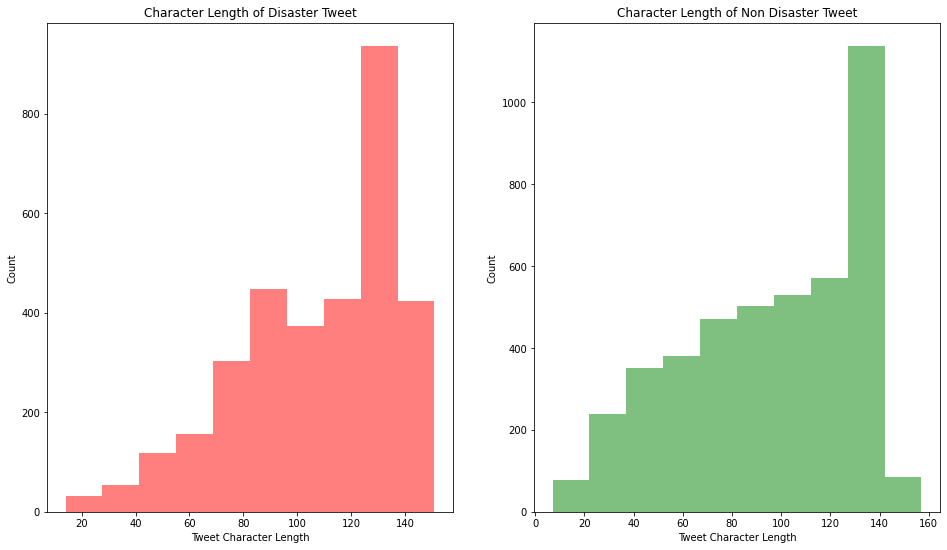

In [26]:
hist_char_length(train_df_cleaned)

## 4.2. Is length of word differs? <a id="4.2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [27]:
def hist_word_length(dataset, add_column=False):
    if not add_column:
        dataset = dataset.copy()
        
    dataset['word_length'] = dataset['text'].apply(lambda x: len(x.split()))
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 9))
    
    axes[0].hist(dataset.loc[dataset['target'] == 1, 'word_length'], color='red', alpha=0.5)
    axes[0].set_title('Word Length of Disaster Tweet')
    axes[0].set_xlabel('Tweet Word Length')
    axes[0].set_ylabel('Count')

    axes[1].hist(dataset.loc[dataset['target'] == 0, 'word_length'], color='green', alpha=0.5)
    axes[1].set_title('Word Length of Non Disaster Tweet')
    axes[1].set_xlabel('Tweet Word Length')
    axes[1].set_ylabel('Count')

    plt.show()

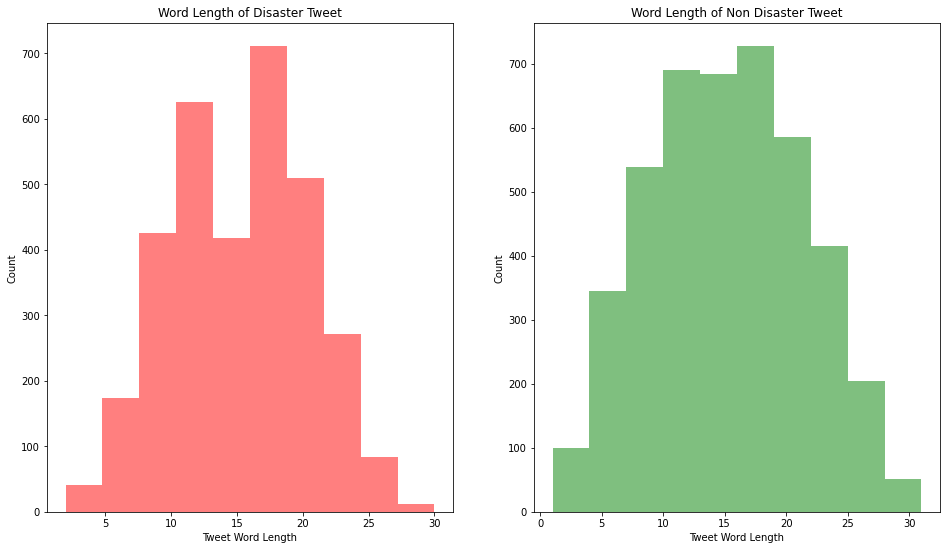

In [28]:
hist_word_length(train_df_cleaned)

## 4.3. Is number of link differs? <a id="4.3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [29]:
def bar_link(dataset, add_column=False):
    if not add_column:
        dataset = dataset.copy()
        
    dataset['n_link'] = dataset['link'].apply(lambda x: len(x.split()))
    link = dataset.groupby('target').sum()['n_link']
    link.index = ['Non Disaster', 'Disaster']
    
    plt.figure(figsize=(9, 9))
    plt.bar(link.index, link.values, color=['green', 'red'])
    plt.xlabel('Non Disaster/Disaster')
    plt.ylabel('Count')
    plt.title('Total Count of Link')
    
    plt.show()

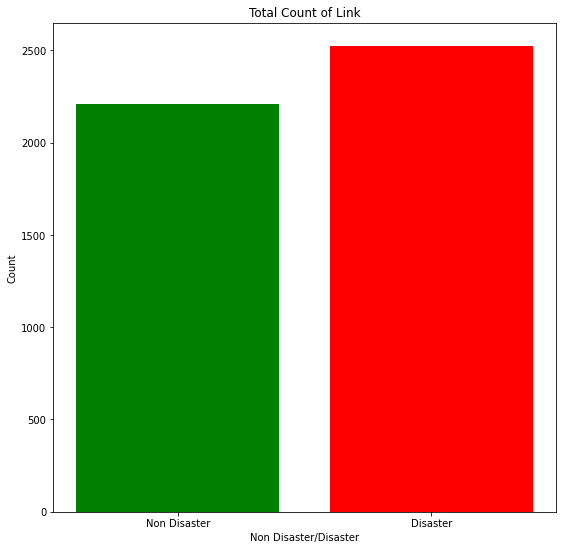

In [30]:
bar_link(train_df_cleaned)

## 4.4. Is number of hashtag differs? <a id="4.4"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [31]:
def bar_hashtag(dataset, add_column=False):
    if not add_column:
        dataset = dataset.copy()
        
    dataset['n_hashtag'] = dataset['hashtag'].apply(lambda x: len(x.split()))
    link = dataset.groupby('target').sum()['n_hashtag']
    link.index = ['Non Disaster', 'Disaster']
    
    plt.figure(figsize=(9, 9))
    plt.bar(link.index, link.values, color=['green', 'red'])
    plt.xlabel('Non Disaster/Disaster')
    plt.ylabel('Count')
    plt.title('Total Count of Link')
    
    plt.show()

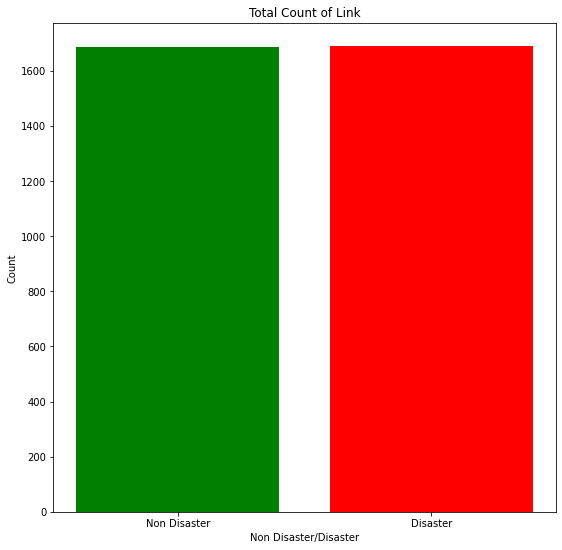

In [32]:
bar_hashtag(train_df_cleaned)

# 5. Model Data <a id="5"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [33]:
train_text = train_df_cleaned['text_cleaned'].to_list()
train_label = np.asarray(train_df_cleaned['target'].to_list())
test_text = test_df_cleaned['text_cleaned'].to_list()

In [34]:
for t, l in zip(train_text, train_label):
    print(l, t)

1 deed reason hashtag earthquake may allah forgive u
1 forest fire near la ronge sask canada
1 resident ask shelter place notify officer evacuation shelter place order expect
1 people receive hashtag wildfire evacuation order california
1 get sent photo ruby hashtag alaska smoke hashtag wildfire pour school
1 hashtag rockyfire update california hwy close direction due lake county fire hashtag cafire hashtag wildfire
1 hashtag flood hashtag disaster heavy rain cause flash flood street manitou colorado spring area
1 im top hill see fire wood
1 there emergency evacuation happen building across street
1 im afraid tornado come area
1 three people die heat wave far
1 haha south tampa get flood hah wait second live south tampa gon na gon na fvck hashtag flooding
1 hashtag rain hashtag flood hashtag florida hashtag tampabay hashtag tampa day ive lose count
1 hashtag flood bago myanmar hashtag arrive bago
1 damage school bus multi car crash hashtag breaking
0 whats man
0 love fruit
0 summer lov

1 wasnt big stab deep stab there like blood everwhe
0 add item everyday eating habit please research take blood link
0 looooooooooool bloody hell link
0 infect bloody ear piercings always fun
0 aggressif bloody aggressive
0 enter hashtag win entire set butterlondon lip crayon via berams go enter hashtag bbloggers link
0 slsandpet hey sally sorry email awol bloody work argh resigninshame
0 im listen bloody jay link
0 lauradeholanda forrest version thats bloody awful well xxx
0 nightmare elm street get remade link
0 cant bloody wait sony set date stephen king dark tower hashtag stephenking hashtag thedarktower link bdisgusting
0 get ta try let go many bloody thing smh
1 tradcatknight russia may play reason link b okanowa bloody mainline invasion look like bloody
1 bloody insomnia grrrr hashtag insomnia
0 zhenghxn try eye akame ga kill tokyo ghoul damn bloody dont dare watch
0 fantosex suck thats youre bloody get mean amends
0 call weekend call bloody mary time summer full new link
0 bloo

1 way gary chicago entrance close due bridge collapse hope let u tomorrow
0 gut deutsch musik old rotten monarchy collapse new may live long live german republic link
0 great british ltbgtbakeltbgt offs back dorrets ltbgtchocolateltbgt gateau collapse jan link
1 organicallyrude rockstar hashtag wish mattingly amp bundy amp mcgwire standing collapse
0 catch gbbo omg girl cake totally collapsed feel bad
1 roof collapse bowl alley many community remember go year kezi link
0 say phil actually collapse gravel sob endlessly crowd watch confused angry mad
1 hour parade like people collapse hashtag oneheartonemindonecss
1 pain second must awful heart burst lung collapse air
1 bay district coach learn cpr medical course panama city athlete collapse field coach link
0 gorpuazikinak tongue collapse cum puddle whole body cover
0 indiepopmom cant breathe lung collapse
0 zimbabwe country collapse government rule dictator many live poverty line
1 durrellb price insane dollar collapse u punish u thank

0 gloriavelez gm pray attack enemy derail ur destiny block lord amp flood ur life wheavenly blessing
0 dont let hashtag tubestrike derail mood join u pisco bar drink work hashtag coya hashtag london link
1 derail train smithsonian
0 wsjthinktank ahead tonight hashtag gopdebate colleenmnelson explain bad debate derail campaign link
1 bbc news india rail crash train derail madhya pradesh flash flood link
1 kill kamayani express janata express derail madhya pradesh ex gratia announce link
0 various issue fail derail home bid link
0 buyout giant bid derail bn worldpay ipo skynews link
1 dozen dead two train derail river india link link
1 kill two simultaneous rail crash acute flood derail two train hashtag india hashtag mumbai link
1 india flood derail two train kill people link
0 congress rename italian goonda party motley crowd hooligan selfavowed crook determine derail democracy
0 mzmandilynn gm pray attack enemy derail ur destiny block lord amp flood ur life wheavenly blessing
1 dozen 

1 ifak individual first aid kit treat single trauma victim think create efak evacuation first aid kit
1 elem pomo help displace rocky fire please considerelem evacuation center link via gofundme
1 bend post office roofer cut gas line prompt evacuation link
1 faan order evacuation abandon aircraft mma faan note action become neces link via todayngr
0 ericbulak jaclynsonne oliviaann look guy live stream im guess evacuation cost front
1 faan give owner abandon aircraft evacuation ultimatum link via dailytimesngr probe
1 update hashtag rockyfire map mandatory evacuation area red advisory evacuation yellow evac center green link
1 update gnwt issue voluntary evacuation order cabin owner pickerel lake near reid link
1 evacuation order lift town roosevelt wash though resident warn ready leave quickly link
0 batfanuk enjoy show today great fun emergency non evacuation interest great run
0 school put evacuation alarm accidently different trial exam happen kidding
1 walk middle michigan ave last

1 scar leave car tree stormhashtag jamaicaplain hashtag boston hashtag hailstorm link
0 calgary news weather traffic august link link
1 stephen ave flower pot get little ripped hailstorm today hashtag yyc hashtag abstorm hashtag calgary hashtag iamdowntown link
1 grow calgary avoids worst city wicked weather link link
1 photo scar leave car tree storm hashtag jamaicaplain hashtag boston hashtag hailstorm link
1 calgary transit review policy leave hundred commuter strand hail link link
1 passenger abandon lrt station tuesday hailstorm link hashtag yyc hashtag yycstorm hashtag abstorm
0 quality metric penalty may harm patient care pcp say primary care physician generally hold positive vi link
0 tareksocal think lot celebrity treat ppl could harm
0 stick stone may break bonesbut word never harm
0 sg anyone try harm cupcake ill fuck hunt end earth hashtag harrybecareful
0 vanderbilt first harm link
1 leedsrouge love pick play worth fifth harmkid ink listen amp vote link
1 imagine doctor tr

1 abc parent colorado theater shoot victim fear copycat massacrelinkhashtag antiochlink
0 bought ticket death bed dude bro party massacre iii w pattonoswalt live alamodc link
0 friday palm beach county hashtag grindhouse series one night screen hashtag texaschainsawmassacre link morbidmovies
0 animallogic lotg smooth blue bird moth caught let go chalked mouse massacre subtle disney dis
1 year sikh temple massacre hateviolence prevention key dviyer colorlines link link
1 massacre hashtag sinjar world forgotten hashtag yazidi linkhashtag hashtag yazidishingalgenocide hashtag ezidigenocide
1 colorado movie massacre trial juror reach verdict mitigating factor link link
1 still uninvestigated year u help incite indonesia massacre link
1 kabarmesir badr never die big crime like rabaa massacre long revolution observedhashtag rememberrabaa
0 bad day
0 eileenmfl serious
1 bestie make watch texas chainsaw massacre
1 petitionno medal massacre justice wound knee killing native american link link
1

1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
1 sandstorm jordan coat middle east largest refugee camp layer grit link link
1 sandstorm woo hoo
1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
0 need friend theres booze darude sandstorm
1 socialwots globiinclusion rt nrcmiddleeast sandstorm engulfs caravan tent hashtag zaatari refugee camp link
1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
1 watch airport get swallow sandstorm minute link
0 sundercr two hour sandstorm remixes merge toge

0 ruddyyyyyy jamiegriff jamie traumatise answer link
0 im traumatise cant even spell properly excuse typo
0 annmarieronan niamhosullivanx cant watch tat show like horror movie get flashback everything hashtag traumatise
1 pyramidhead one good thing come watch film traumatise watch show start halt amp catch fire amazon
0 ianokavo he still traumatise
0 think im traumatise life
0 america like south africa traumatise sick country different way course still mess
0 kid orphanage obviously traumatise link
0 mprnews wow thats lot traumatised kid
0 yessum im traumatise
0 perkpearl thats id traumatise ok car go hashtag gbbo relax
0 viennabutcher funny im traumatise
0 wrongdejavu im traumatise
0 malabamiandsons shes proper traumatise pepper dead cant wait see face
1 disneyirh traumatise im link
0 send snapchat wrong person instead brother toilet hashtag snapchatselfie hashtag wrongperson hashtag traumatise
0 emilyeverever haha alrightbut twice stupid he traumatise
0 im sad kid company close talk 

In [35]:
for t in test_text:
    print('?', t)

? happen terrible car crash
? heard hashtag earthquake different city stay safe everyone
? forest fire spot pond goose flee across street save
? apocalypse light hashtag spokane hashtag wildfire
? typhoon soudelor kill china taiwan
? shakingits earthquake
? theyd probably still show life arsenal yesterday eh eh
? hey
? nice hat
? fuck
? dont like cold
? nooooooooo dont
? dont tell
? 
? awesome
? birmingham wholesale market ablaze bbc news fire break birminghams wholesale market link
? sunkxssedharry wear short race ablaze
? hashtag previouslyondoyintv toke makinwas marriage crisis set nigerian twitter ablaze link
? check link link link link hashtag nsfw
? psa im split personality techie follow ablazeco burner follow ablaze
? beware world ablaze sierra leone amp guap
? burn man ablaze turban diva link via etsy
? dis song people take thing run smh eye opener though set game ablaze cyhitheprynce
? rape victim die set ablaze yearold girl die burn injury set ablaze link
? set ablaze link
? 

? one direction pick link fan army hashtag directioners link x
? shark army black date stainless steel quartz men sport watch full read ebay link link
? beyonce pick link fan army hashtag beyhive link
? second summer pick link fan army hashtag sosfam link
? beyonce pick link fan army hashtag beyhive link
? victorinox swiss army date woman rubber mop watch link link
? hope salvation army least give tax receipt link
? one direction pick link fan army hashtag directioners link x
? one direction pick link fan army hashtag directioners link x
? one direction pick link fan army hashtag directioners link x
? check data upper wabash reservoir louisvilleusace site link
? answertherefore come pas sixteenth year go forth head army link
? one direction pick link fan army hashtag directioners link x
? second summer pick link fan army hashtag sosfam link
? cheesehead report arson charge file jackson county house fire link
? arson suspect link fire catch northern california link
? israeli police unab

? ok two favorite thing collide one great ht hashtag literarycakes link
? call car v feed ex truck head collision mile marker prayer family get scene
? motorcyclist bicyclist injure denver collision broadway link
? motorcyclist bicyclist injure denver collision broadway least two people take local link
? traffic collision ambulance enroute florin rd franklin blvd south sac link
? denver post motorcyclist bicyclist injure denver collision broadway link
? collision daaamn
? marin sr sr trfc collisionunkn inj link
? riverside n sr e con n sr w con trfc collisionunkn inj link
? techerit anti collision rear hashtag gadget hashtag technology link
? anti collision rear hashtag innovation hashtag gadget link
? mom fight recover hospital fiery car crash kid miss home link
? citation billing police officer cause broadwater crash link link
? little angel banjo pilon die skateboard crash wamberal weekend yearold b link
? lol guy whip double yellow line mustang crash curb light pole hashtag sn
? ne

? business deluge invoice make stand olour share likely rise top pay pile
? business deluge invoicew make stand colouj shape likely rise top pay pile
? business deluge invoice make stand colour shape ikely rise pay pile
? cant believe never occur could deluge kickstarter email
? business deluge ivoices make stand colour shape likely ri top pay pile
? facebook deluge friending spam last day someone target reason
? glimpse ltbgthyderabadltbgt deluge heavy rainfall hyderabad flood water head link
? deluge dismay sosoon surrender summer droughtdescending disturbedhashtag sunrisehaiku hashtag poetry hashtag wimberley hashtag atxsmtx link
? horror community deluge cruddy ostensibly macabre photography dont contribute pandemic
? bartonleclay house owner tell demolish extension bbc news link
? rt abbswinston hashtag zionist hashtag terrorist demolish tire repair shop structure hashtag bethlehemlink link
? salvation army bid demolish cottage link hashtag southend link
? enugu government demolis

? fplhints hazard depay ozil ritchie go crazy striker midfielders hashtag fplboss
? parent beware household hazard wont go away link
? con el crack de hazzel hazard saint john episcopal school link
? hold batman hazard suit link
? choke hazard prompt recall kraft cheese single link
? eden hazard john terry sergio aguero honourable mention nemanja matic link
? hazardvn accuracyesports add
? superbobbypires hazard ronaldo cantona pepe lash
? road hazard e confederate ave se moreland ave se link
? hashtag ine hashtag instyle olap hashtag world pres link recognize hazardous waste multidimensi link
? hashtag hazardous hashtag waste hashtag treatment hashtag disposal aug market growth feeble link hashtag marketresearch hashtag statistic
? hashtag alfa hashtag forecast olap hashtag world pres link recognize hazardous waste multidimen link
? moneymaker tanker truck overturn carry hazardous material
? chs issue hazardous weather outlook hwo link hashtag wx
? hashtag diablo hashtag dsp olap hash

? watch airport get swallow sandstorm minute link
? watch airport get swallow sandstorm minute link
? gon na throw huge party play nothing sandstorm
? watch airport get swallow sandstorm minute link
? watch airport get swallow sandstorm minute link
? watch airport get swallow sandstorm minute link
? watch airport get swallow sandstorm minute link
? like youtube video centralupload link oh oh
? watch airport get swallow sandstorm minute link
? watch airport get swallow sandstorm minute link
? watch airport get swallow sandstorm minute link
? watch airport get swallow sandstorm minute link
? reply somebody comment sayingdarude sandstorm negatively feel bad
? scream gmontani jessemontani run john st place im happy love guy hashtag amazingracecanada
? oh god rosie odonnell foster scream name fit shock awe
? im meltdown game throne literally cry scream threw computer hashtag whyyyy hashtag redwedding
? scream saw jordan come door behind donnie hashtag wahlburgers
? joshshatsays scream yeah


In [36]:
train_text, validation_text, train_label, validation_label = train_test_split(
    train_text,
    train_label,
    test_size=0.1
)

In [37]:
print('Length of Train: {}'.format(len(train_text)))
for t, l in zip(train_text, train_label):
    print(l, t)

Length of Train: 6851
0 reddit quarantine offensive link hashtag onlinecommunities hashtag reddit hashtag amageddon hashtag freespeech link
1 moscowghost sayedridha aminakh congratulation capture besiege city month indiscriminate bomb land amp air
1 hashtag russia food crematorium provoke outrage country wsoaring poverty soviet famine memory link link
1 yearold boy charge manslaughter toddler report yearold boy charge manslaughter fatal sh
0 draw day demolition daily football selection service consistently make money lay yo link link
0 scottwalker send poor middle class child war come body bag typical gop
0 girl next screamed fuck chonce im cryibg
1 violent afternoon storm severe weather head chicago tonight detail gt link
0 probably stay away hot glue gun burn one finger pretty bad
0 feel like deathholy molys
1 police officer wound suspect dead exchange shot richmond va ap richmond police officer wa link
1 omfg bush fire tiny island freak house gon na burn
1 cue storm massive wind hai

0 ignition knock detonation sensor connectorconnecto motorcraft wpt link link
1 perspective grateful dead critical writing contribution study link link
1 hashtag day emergency service display meet brave police firefighter first responder help keep u safe
1 hashtag bestnaijamade yr old pkk suicide bomber detonate bomb link bestnaijamade bestnaijamade bestnaijamade
1 stem hashtag cub talk team roster cancer survivor arizzo amp jlestercubs fan help another link
0 health fact muscle mass make fluid drink water prevent strain sprain injury link
0 stavernise france agree repay russia two warship never deliver economic sanction link
1 ssp east say car aeg drive young man collide akrams carhot word exchange n fire airbullet hit tyre
0 ielectrocute turn
1 hiroshima tell paint story eightynine year old man recall terror trauma link
0 world collide american family take britain isle man new tlc show suddenly royal link via people
0 elgeotaofeeq thats take piece put ambition check destroy change vo

0 lose bus cardpanickind bus driverreplace bus cardfind bus cardheaddesk
0 gop want destroy america obama dilutional institutionalize sue slander link
1 deaddreamer fire thatd safety hazard
0 cut celebrety post wound online nogo
0 survive tonight wouldnt change one thing
0 ruddyyyyyy jamiegriff jamie traumatise answer link
0 u national park service tonto national forest stop annihilation salt river wild horse link via change
1 landslide italian alp kill three rome reuters three people kill severe rainstorm link
0 rhee deliciousvomit im im say theyre lucky go home family put body bag
0 new expansion idea bard class holy trinity link
1 two train collide india please pray victim family rescuer
0 people know kendall jenner time instagram follower gd scream lmao
0 olrules welcome read free chapter new book encounter jesus full hope link
0 finnish nuclear plant move ahead financing secured link via business
1 poland work party prisoner nazi death camp treblinka rebel seize small arm set buil

1 myanmar president urge people leave lowlying southern delta region thursday rain water inundate much coun
0 meek mill join isi since love suicidebombing career good reason
0 like youtube video zaire link specialguest crapgamer recap microsoft destroy sony gamescom
0 link arianagrande screamqueens katherines death
1 film doctor must leave immediately core unstablethe whole building tell evacuate take research need
1 unsuckdcmetro minor train leave rail major smithsonian interlock derails amp crash barrier wall w fatality
0 russian hashtag ushanka hashtag winter hashtag military fur hat xl soviet badge linklink link
0 hashtag sismo km nne geyser california time utc link hashtag c
1 year hiroshima nagasaki consequence nuclear detonation icrc link
1 gon na call tomorrow aul emergency dental appointment excuse like whole tooth fall incident last year
1 eudrylantiqua hollywood movie trap miner release chile holly link eudrylantiqua
0 cabin fever flame link
1 earthquake occur near mount st 

0 comcastcares hey happing trouble shoot step happens
1 oh yeah ipod almost explode last night use charge shit spark akxbskdn almost die
0 one thing suregod promise israel annihilate butthe horror iran wnukes link
0 pledge allegiance pope burn building epic city
1 multiple building fire downtown hinton link link
0 gailsimone hashtag iwasdisappointedby telltale walk dead good character ampstory real gameplay many performance issue
0 appleofficlal migrate iphoto photo catastrophe waste day try get work hrsto get complete
1 highqualitybird reverse situation lol dont know u civilian death specifically utilized make political
1 ohh fukurodani didnt survive apocalypse bokuto feel horrible poor boy ppor child
1 slone first world war ever truly end ripple still compound low level tsunami
1 iamtalia sgc thousand people displacedinjuredkilled hey there opportunity different restaurant
1 talent misdirection cyclone pas ignite pas vanish drive phantom shot hashtag kurokobot
0 hashtag tech data ove

0 trouble understand rotation within leftleaning red black tree class currently learni link
0 bairstow drop buffet ticket devastate lad
0 likeavillasboas richchandler injury prone isnt actually suffer injury often
0 casualty insurance job hunt willinghearted rpn link
1 dc medium tip get update derail hashtag wmata train today ask movie night quickly change subject
0 lauradeholanda forrest version thats bloody awful well xxx
0 ted cruz fire back jeb amp bush lose republican like jeb amp mitt video link
1 ohmygoshi unsuckdcmetro point expect hear report metrobus derail
1 youre search powerful content improve business frustrate deluge quantitlink
1 dt georgegalloway rt gallowaymayor col police catch pickpocket liverpool stree link
1 bay district coach learn cpr medical course panama city athlete collapse field coach link
1 motorcyclist bicyclist injure denver collision broadway least two people take local link
0 lava
1 hashtag break th death confirm legionnaire outbreak south bronx total 

0 kijimamatako break news unconfirmed heard loud bang nearby appear blast wind neighbour ass
1 vacation update great aunt kill spider bare hand scream fear hashtag fierce
1 hashtag krefeld incident happen chemical industry park emergency operation underway build reportly collapse cnnbrk ntvde
1 madhya pradesh train derailment village youth save many life
0 real hero rip brave heart link
0 orchid sign witch link
1 latest home raze northern california wildfire link link
0 tyleroakley im scream
0 go ruin something awful hashtag minion link
0 weapon catalogue
1 hashtag pbban temporary hyiderghost armageddon kill flag fast xp reason
0 damn there really mlk center hasnt sunk yet
1 kai forbath demolish weather station set drill field miss field goal thing explode metal bit
1 suicide bomb daesh rightly despicable suicide bomb ocalan marxism share value link
0 ianhellfire really idea many time ignored fadc cant expect anything
0 like youtube video dannyonpc link battlefield hardline new weapon 

0 gain follower last week know stats grow link
0 horrible moment u open dryer look like snowy blizzard cuz u leave piece paper jean pocket
1 hashtag jsunnews storm damage report madison county thunderstorm damage report ar link via link
1 hashtag irandeal cover nuclear activity bioterrorism iran break least agreement
1 cnni prisonplanet climate change cnn weather specialist warningwild fire rain flood note sun link
0 survive
0 wyrmwood road dead fuck awesome awesome end awesome one
1 wreckage conclusively confirm mh malaysia pm link link
0 josebasedgod im obliterate shadow realm
0 god bless catastrophe
0 zone enders mgs god war rt dpagexxi quote favorite p game
0 hashtag hot funtenna hijack computer send data sound wave black hat link hashtag prebreak hashtag best
0 babysweet im mad name amp dont blaze
0 mama scar thunder
1 hashtag hot c specially modify land stadium rescue hostage iran link hashtag prebreak hashtag best
0 dr jim amp tsunami latest new yorker warn u uncertain term have

0 first night retainer quite weird better get use wear every single night next year least
1 rt nlmdimrc deluge resource hashtag flood medical provider cleanup worker amp link
0 chikislizeth youre injure anymore
1 raffirc rt sustainourearth oklahoma act limit earthquake risk oil gas well scoopit link love thi
1 utckm volcano hawaii link
0 wwi wwii japanese army navy military japan leather watch war mido ww full read ebay link link
0 ever since kelly burn keep dream inside burning building
0 villicanaalicia darude sandstorm
0 brian shaw jj hickson kenneth faried try defend lamarcus aldridge blood volcano link
0 new post seismicsoftware major challenge channel sale enablement link
0 vassalboro house raze make way public gazebo petelmcguire report link
1 rt abbswinston hashtag zionist hashtag terrorist demolish tire repair shop structure hashtag bethlehemlink link
1 jun yemeni search survivor rubble house old city sana follow link
1 nasa modis image dust storm morocco strait gibraltar link

In [38]:
print('Length of Validation: {}'.format(len(validation_text)))
for t, l in zip(validation_text, validation_label):
    print(l, t)

Length of Validation: 762
1 bmx issue areal flood advisory shelby al till aug pm cdt link
1 catastrophic effect hiroshima nagasaki atomic bombing still felt today link
0 stuart broad take eight joe root run riot aussie
0 hellfire surround desire careful dont let desire control hashtag afterlife
1 horrible accident man die wing airplane link
1 india flood derail two train kill people link
0 raabchar drphil morganlawgrp selfinflict wind side blunt force trauma consistent fall dimension
0 official vid hashtag thereal gtgtgt link gtgtgt trubgme gtgtgt hashtag armageddon comin soon
0 want smoke
0 lie clinton sinking donald trump sing let make america great link
1 rly tragedy mp live recount horror saw coach train plunging water call link
0 become another casualty society
0 beautifuljuic letting know
1 ca cop illegal immigrant prior arrest charge fatal sex attack link
1 hashtag fukushimatepcomountains debris japanese tsunami float west coastlink
0 really happen take king story trailer space 

## 5.1. Prepare Dataset <a id="5.1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [39]:
SEQUENCE_LENGTH = 30
N_TRAIN = train_label.shape[0]
BATCH_SIZE = 64
EPOCHS = 30
ITERATIONS = N_TRAIN // BATCH_SIZE

In [40]:
def train_tokenizer(text):
    tokenizer = keras.preprocessing.text.Tokenizer(oov_token='UNK')
    tokenizer.fit_on_texts(text)
    return tokenizer

In [41]:
tokenizer = train_tokenizer(train_text)

In [42]:
tokenizer.texts_to_sequences(['s ssssssss s']) # ssssssss is not in tokenizer index

[[8556, 1, 8556]]

In [43]:
tokenizer.index_word

{1: 'UNK',
 2: 'link',
 3: 'hashtag',
 4: 'get',
 5: 'like',
 6: 'fire',
 7: 'amp',
 8: 'im',
 9: 'go',
 10: 'u',
 11: 'new',
 12: 'via',
 13: 'dont',
 14: 'people',
 15: 'say',
 16: 'one',
 17: 'bomb',
 18: 'news',
 19: 'kill',
 20: 'video',
 21: 'time',
 22: 'make',
 23: 'crash',
 24: 'emergency',
 25: 'come',
 26: 'body',
 27: 'flood',
 28: 'year',
 29: 'burn',
 30: 'see',
 31: 'police',
 32: 'disaster',
 33: 'attack',
 34: 'look',
 35: 'day',
 36: 'know',
 37: 'family',
 38: 'home',
 39: 'take',
 40: 'still',
 41: 'love',
 42: 'would',
 43: 'storm',
 44: 'think',
 45: 'building',
 46: 'back',
 47: 'watch',
 48: 'california',
 49: 'train',
 50: 'death',
 51: 'bag',
 52: 'world',
 53: 'want',
 54: 'man',
 55: 'suicide',
 56: 'cant',
 57: 'first',
 58: 'collapse',
 59: 'rt',
 60: 'nuclear',
 61: 'scream',
 62: 'car',
 63: 'pm',
 64: 'need',
 65: 'youtube',
 66: 'life',
 67: 'let',
 68: 'work',
 69: 'cause',
 70: 'wreck',
 71: 'accident',
 72: 'war',
 73: 'dead',
 74: 'two',
 75: 'full

In [44]:
def text_to_valid_sequence(text, maxlen=SEQUENCE_LENGTH, tokenizer=tokenizer):
    sequence = tokenizer.texts_to_sequences(text)
    sequence = keras.preprocessing.sequence.pad_sequences(
        sequence, 
        maxlen=maxlen, 
        padding='post', 
        truncating='post'
    )

    return sequence

In [45]:
train_sequence = text_to_valid_sequence(train_text)
validation_sequence = text_to_valid_sequence(validation_text)
test_sequence = text_to_valid_sequence(test_text)

In [46]:
train_sequence.shape

(6851, 30)

In [47]:
validation_sequence.shape

(762, 30)

In [48]:
test_sequence.shape

(3263, 30)

In [49]:
train_sequence

array([[  216,   140,   489, ...,     0,     0,     0],
       [ 5140,  5141,  5142, ...,     0,     0,     0],
       [    3,   900,   222, ...,     0,     0,     0],
       ...,
       [    3,   118,  1399, ...,     0,     0,     0],
       [14060, 14061,   739, ...,     0,     0,     0],
       [   11,   728,   163, ...,     0,     0,     0]], dtype=int32)

In [50]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sequence, train_label))
train_dataset = train_dataset.shuffle(N_TRAIN)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.repeat()

In [51]:
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_sequence, validation_label))
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)

In [52]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_sequence))
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## 5.2. Embedding Weights <a id="5.2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [53]:
VOCAB_SIZE = len(tokenizer.word_index) + 1
EMBEDDING_DIM = 100

In [54]:
def load_embedding(path='./data/glove/glove.6B.100d.txt'):
    embedding_vector = dict()
    with open(path) as f:
        for line in tqdm(f):
            value = line.split()
            word = value[0]
            coef = np.array(value[1:], dtype='float32')
            embedding_vector[word] = coef
    return embedding_vector

In [55]:
embedding_vector = load_embedding('./data/glove/glove.6B.100d.txt')

400000it [00:11, 35074.42it/s]


In [56]:
embedding_vector['a'].shape

(100,)

In [57]:
def initialize_embedding_weights(tokenizer=tokenizer, embedding_vector=embedding_vector):
    embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
    for word, idx in tqdm(tokenizer.word_index.items()):
        embedding_value = embedding_vector.get(word)
        if embedding_value is not None:
            embedding_matrix[idx] = embedding_value
    return embedding_matrix

In [58]:
embedding_matrix = initialize_embedding_weights()

100%|██████████| 14064/14064 [00:00<00:00, 500914.48it/s]


In [59]:
embedding_matrix.shape

(14065, 100)

## 5.3. Data Modeling <a id="5.3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [60]:
LEARNING_RATE = 3e-05

In [61]:
class DisasterTweetModel(keras.Model):
    def __init__(self, vocab_size, embedding_dim, input_length):
        super(DisasterTweetModel, self).__init__()
        
        self.embedding = keras.layers.Embedding(
            vocab_size, 
            embedding_dim,
            input_length=input_length,
            weights=[embedding_matrix],
            trainable=False,
            name='embedding'
        )
        
        self.bi_lstm1 = keras.layers.Bidirectional(keras.layers.LSTM(64), name='lstm1')
        self.dropout1 = keras.layers.Dropout(0.5, name='dropout1')

        self.dense2 = keras.layers.Dense(1, activation='sigmoid', name='dense2')
        
    def call(self, inputs, training=None):
        inputs = self.embedding(inputs)

        layer1 = self.bi_lstm1(inputs)
        layer1 = self.dropout1(layer1)

        outputs = self.dense2(layer1)
        
        return outputs

In [62]:
model = DisasterTweetModel(VOCAB_SIZE, EMBEDDING_DIM, SEQUENCE_LENGTH)
temp = keras.Input((SEQUENCE_LENGTH))
model(temp)
model.summary()

Model: "disaster_tweet_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1406500   
_________________________________________________________________
lstm1 (Bidirectional)        (None, 128)               84480     
_________________________________________________________________
dropout1 (Dropout)           (None, 128)               0         
_________________________________________________________________
dense2 (Dense)               (None, 1)                 129       
Total params: 1,491,109
Trainable params: 84,609
Non-trainable params: 1,406,500
_________________________________________________________________


In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
lr_decay = keras.optimizers.schedules.ExponentialDecay(LEARNING_RATE, 10, 0.8)
lr_callback = keras.callbacks.LearningRateScheduler(lr_decay, verbose=1)

## 5.4. Training <a id="5.4"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [65]:
history = model.fit(
    train_dataset, 
    epochs=EPOCHS, 
    steps_per_epoch=ITERATIONS, 
    callbacks=[lr_callback], 
    validation_data=validation_dataset, 
    verbose=1
)

Train for 107 steps, validate for 12 steps

Epoch 00001: LearningRateScheduler reducing learning rate to tf.Tensor(3e-05, shape=(), dtype=float32).
Epoch 1/30
107/107 [==============================] - 5s 49ms/step - loss: 0.6907 - accuracy: 0.5454 - val_loss: 0.6877 - val_accuracy: 0.5328

Epoch 00002: LearningRateScheduler reducing learning rate to tf.Tensor(2.9337982e-05, shape=(), dtype=float32).
Epoch 2/30
107/107 [==============================] - 2s 22ms/step - loss: 0.6758 - accuracy: 0.5933 - val_loss: 0.6718 - val_accuracy: 0.5866

Epoch 00003: LearningRateScheduler reducing learning rate to tf.Tensor(2.8690574e-05, shape=(), dtype=float32).
Epoch 3/30
107/107 [==============================] - 2s 22ms/step - loss: 0.6522 - accuracy: 0.6529 - val_loss: 0.6408 - val_accuracy: 0.6916

Epoch 00004: LearningRateScheduler reducing learning rate to tf.Tensor(2.8057453e-05, shape=(), dtype=float32).
Epoch 4/30
107/107 [==============================] - 2s 22ms/step - loss: 0.5890 - 

# 6. Validate and Implement<a id="6"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [66]:
def plot_history(train_metric, val_metric, mode='accuracy'):
    assert mode in ['accuracy', 'loss']
    
    epochs = range(1, EPOCHS + 1)
    
    plt.plot(epochs, train_metric, label='train')
    plt.plot(epochs, val_metric, label='validation')
    
    plt.legend()
    plt.title('History of {}'.format(mode))
    plt.xlabel('epochs')
    plt.ylabel(mode)
    plt.show()

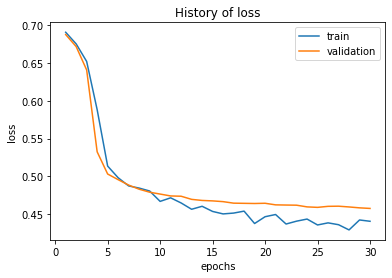

In [67]:
plot_history(history.history['loss'], history.history['val_loss'], mode='loss')

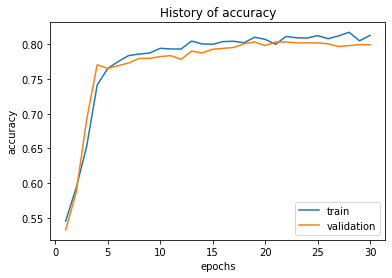

In [68]:
plot_history(history.history['accuracy'], history.history['val_accuracy'], mode='accuracy')

In [69]:
model.save_weights('./models/DisasterTweetv4/DisasterTweetModel')

In [70]:
prediction = model.predict(test_sequence)
prediction

array([[0.85897034],
       [0.87200046],
       [0.92478895],
       ...,
       [0.6000671 ],
       [0.6279369 ],
       [0.44405755]], dtype=float32)

In [71]:
submission = pd.read_csv('./data/sample_submission.csv', encoding='utf-8')
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [72]:
submission['target'] = prediction
idx = submission['target'] > 0.5
submission.loc[idx, 'target'] = 1
submission.loc[~idx, 'target'] = 0
submission['target'] = submission['target'].astype('int64')
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [73]:
submission.to_csv('./data/submission/submission-v4.csv', index=False, encoding='utf-8')